Details on the attributes:
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading data csv into dataframe

df = pd.read_csv('data/archive.zip')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
## Renaming columns for ease of understanding

df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'}, inplace = True)

In [44]:
# shape of data
df.shape

(303, 14)

In [45]:
# missing values
df.isna().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_attack               0
dtype: int64

In [177]:
## Create an indepent set because df2 gets modified in the following steps 

df1 = df.copy()
df1['Sex'].replace({1: 'Male', 0: 'Female'}, inplace=True)
df1['Heart_attack'].replace({1: 'Heart_attack - Yes', 0: 'Heart_attack - No'}, inplace=True)

In [126]:
## renaming some of the values for better visualizations
df2 = df.copy()
df2['Sex'].replace({1: 'Male', 0: 'Female'}, inplace=True)
df2['Heart_attack'].replace({1: 'Heart_attack - Yes', 0: 'Heart_attack - No'}, inplace=True)

In [50]:
## Grouping the incidents of heart attacks by age and sex

## In top 20 count of heart attacks there are a relatively more
# male than female for their age group

s = df2.groupby(['Sex', 'Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(20).style.background_gradient(cmap='Purples')

,Sex,Age,Heart_attack
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


In [55]:
## ~200% more heart_attacks with 0 chest_pain than level 2 chest_pain in males
## Similar trend but not as pronounced in females

s = df2.groupby(['Sex', 'Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,Chest_pain,Heart_attack
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


In [64]:
## Looking at relationship between Sex, resting blood pressure and instances of heart attacks
## No coconslusive relation showing higher resting blood pressure and heart attacks

s = df2.groupby(['Sex', 'Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Resting_blood_pressure,Heart_attack
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


In [75]:
## relation between sex, cholesterol and no of heart attacks
## Need a bit more domain knowleadge to understand the significance of 
# cholesterol values
## In general a lot more males than females on the relationships

s = df2.groupby(['Sex', 'Cholesterol'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Cholesterol,Heart_attack
115,Male,212,5
109,Male,204,4
135,Male,234,4
134,Male,233,4
172,Male,282,4
150,Male,254,4
48,Female,269,4
144,Male,246,3
143,Male,245,3
141,Male,243,3


In [104]:
## >120 mg/dl is 1 else 0 for fasting blood sugar

s = df2.groupby(['Sex', 'Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,Sex,Fasting_blood_sugar,Heart_attack
2,Male,0,174
0,Female,0,84
3,Male,1,33
1,Female,1,12


In [106]:
## Lower value for ECG associate with counts of heart attack
## Need domain knowledge to understand the relationship

s = df2.groupby(['Sex', 'ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,Sex,ECG_results,Heart_attack
3,Male,0,103
4,Male,1,103
1,Female,1,49
0,Female,0,44
2,Female,2,3
5,Male,2,1


In [99]:
## Relationship between max heart rate and heart attacks
## Need more domain knowledge here 

s = df2.groupby(['Sex', 'Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Maximum_heart_rate,Heart_attack
86,Male,144,7
77,Male,132,7
103,Male,162,7
113,Male,173,7
82,Male,140,6
42,Female,172,6
91,Male,150,6
70,Male,125,6
97,Male,156,6
34,Female,163,5


In [107]:
## Relationship between exercise induced angina(chest pain) and heart attack counts

s = df2.groupby(['Sex', 'Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head().style.background_gradient(cmap='Greens')

,Sex,Exercise_induced_angina,Heart_attack
2,Male,0,130
3,Male,1,77
0,Female,0,74
1,Female,1,22


In [109]:
## Relationship between st-wave depression and heart attack counts 
# Low value relates to higher count of heart attacks 

s = df2.groupby(['Sex', 'ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,Sex,ST_depression,Heart_attack
27,Male,0.000000,64
0,Female,0.000000,35
37,Male,1.200000,13
34,Male,0.800000,10
36,Male,1.000000,9
41,Male,1.800000,8
38,Male,1.400000,8
33,Male,0.600000,8
43,Male,2.000000,7
40,Male,1.600000,7


In [110]:
## no of major_vessels colored and no of heart attacks
## value of major_vessels I believe pertains to no of vessels that are blocked
## 0 means all 4 major vessels are blocked which relates to higher heart attack count

s = df2.groupby(['Sex', 'Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,Sex,Major_vessels,Heart_attack
4,Male,0,111
0,Female,0,64
5,Male,1,50
6,Male,2,25
7,Male,3,16
1,Female,1,15
2,Female,2,13
8,Male,4,5
3,Female,3,4


In [113]:
### thalassemia_type and heart attack counts
## Higher number pertains to reversible defect while lower is normal condition
# inbetween is the fixed defect

## higher number relates to higher count of heart attacks in both male and female

s = df2.groupby(['Sex', 'Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack', ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,Sex,Thalassemia_types,Heart_attack
7,Male,3,102
6,Male,2,87
2,Female,2,79
5,Male,1,17
3,Female,3,15
0,Female,0,1
1,Female,1,1
4,Male,0,1


Correlation map of continuous variables

<AxesSubplot:>

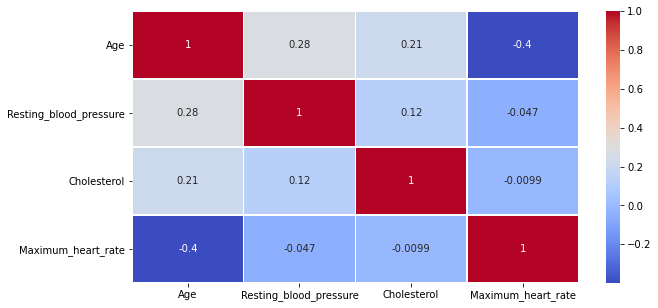

In [127]:
## Age positively correlates with resting blood pressure and cholesterol


df2.drop(['Sex','Fasting_blood_sugar','Heart_attack','Chest_pain','ECG_results','Exercise_induced_angina','ST_slope','ST_depression','Major_vessels','Thalassemia_types'],
         axis = 'columns',inplace = True)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

Univariate Analysis (looking at one feature at a time)

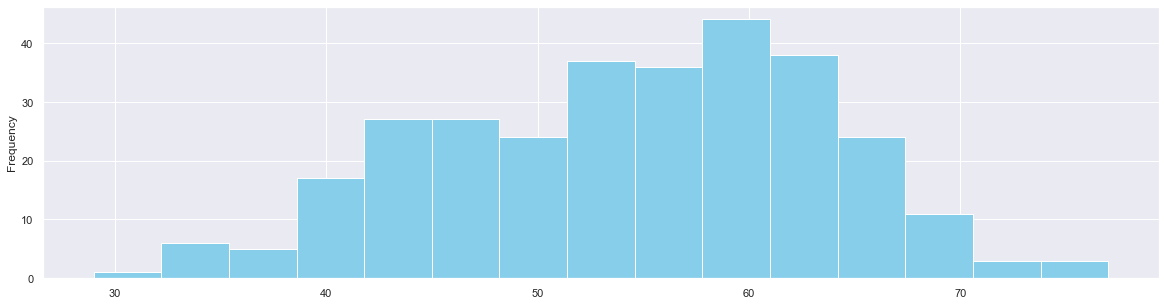

In [140]:
## distribution of age in the sample

sns.set(rc={'figure.figsize':(20,5)})
df['Age'].plot.hist(bins=15, color='skyblue')
plt.show()

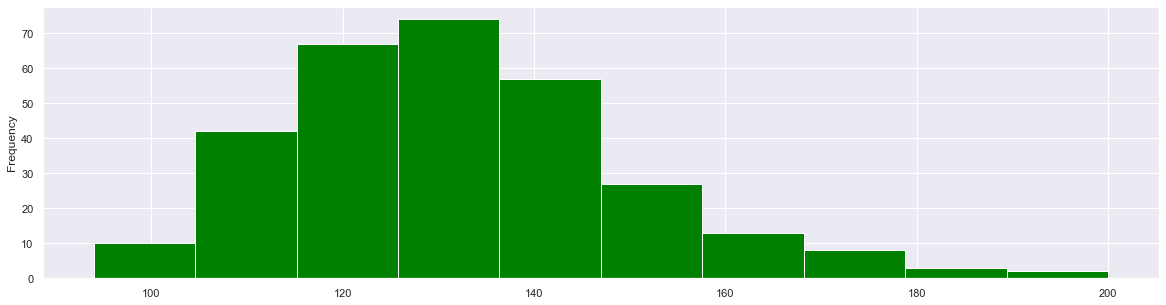

In [143]:
## distribution of resting blood pressure

df['Resting_blood_pressure'].plot.hist(color='green', bins=10)
plt.show()

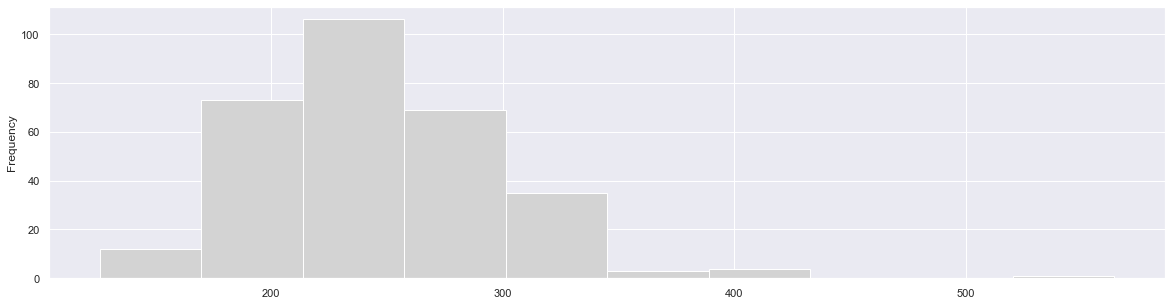

In [146]:
# distribution of cholesterol
df['Cholesterol'].plot.hist(bins=10, color='lightgrey')
plt.show()

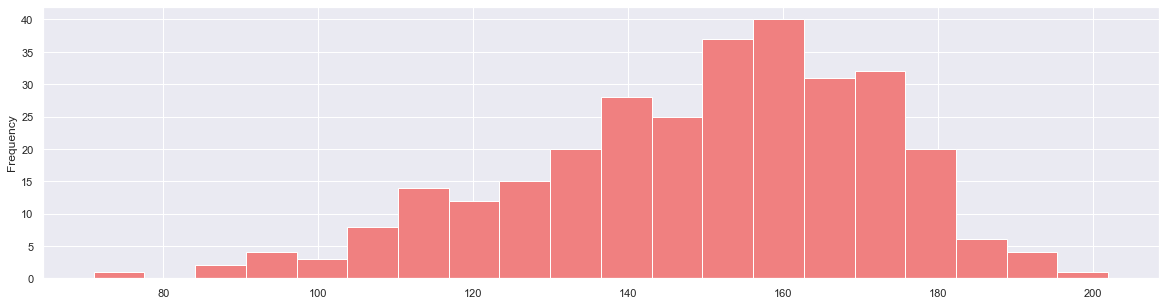

In [152]:
# distribution of maximum heartrate
df['Maximum_heart_rate'].plot.hist(bins=20, color='lightcoral')
plt.show()

Bivariate analysis (relationship between two features)

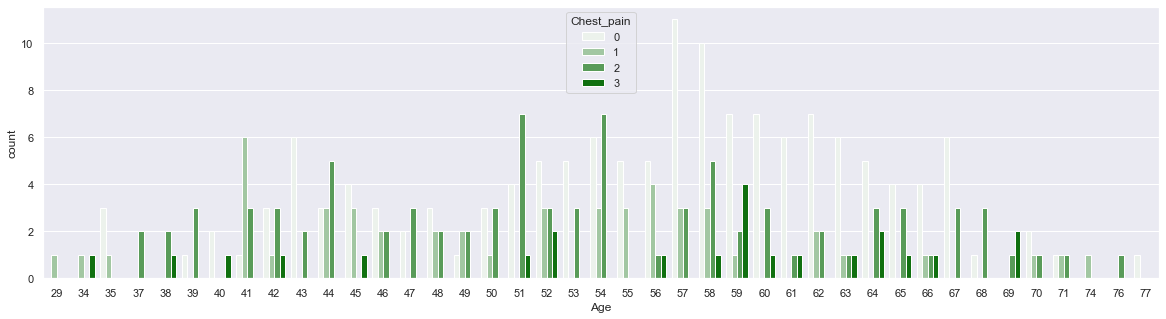

In [156]:
## relationship between chestpain and age

sns.countplot(x='Age', hue='Chest_pain', data=df, color='green')
plt.show()

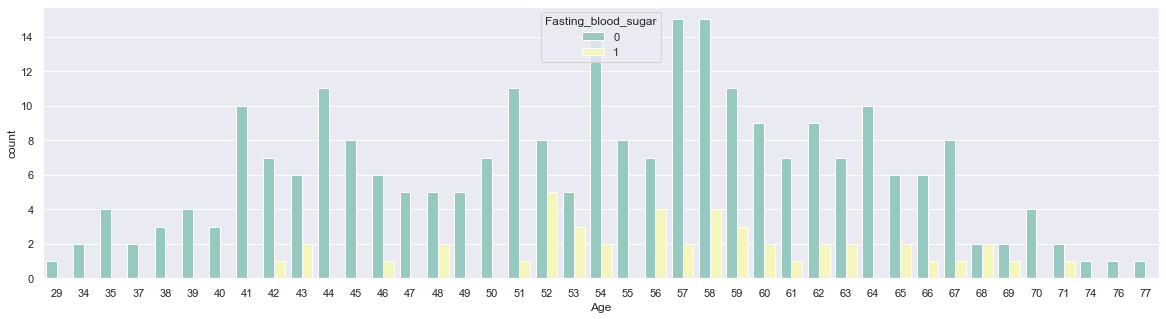

In [158]:
## Relationship between Fasting blood sugar and age

sns.countplot(x='Age', hue='Fasting_blood_sugar', data=df, palette="Set3")
plt.show()

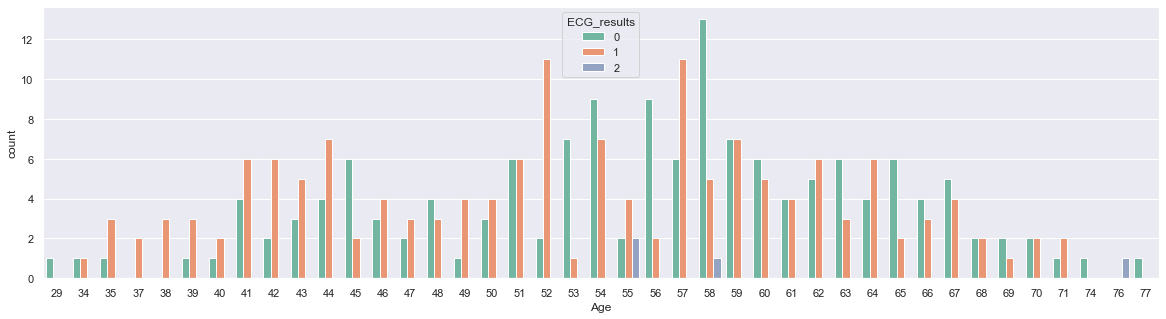

In [160]:
## Relationship between ECG and age

sns.countplot(x='Age', hue='ECG_results', data=df, palette="Set2")
plt.show()

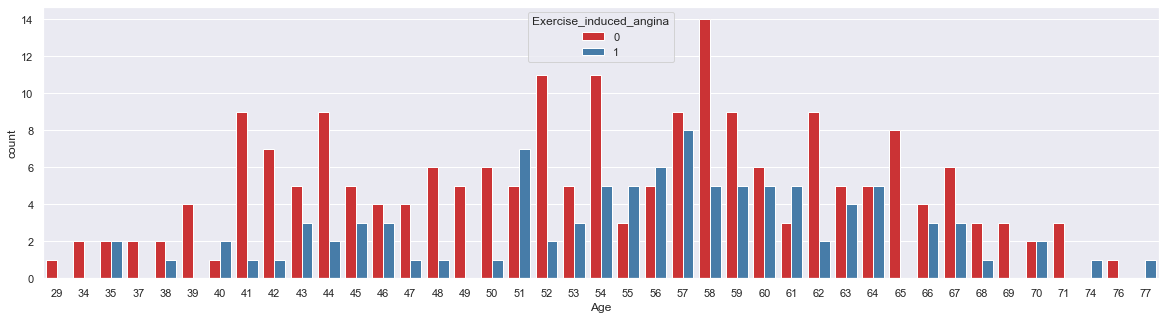

In [162]:
## Relationship between Exercise induced angina and age


sns.countplot(x='Age', hue='Exercise_induced_angina', data=df, palette="Set1")
plt.show()

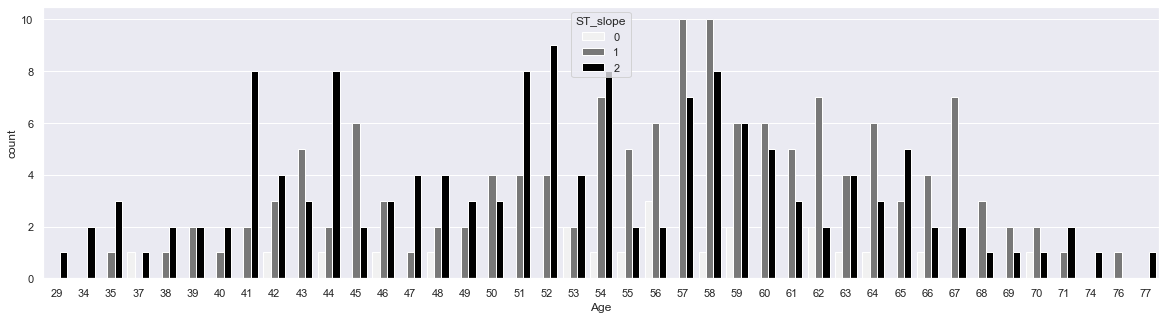

In [163]:
## Relationship between ST Slope and age


sns.countplot(x='Age', hue='ST_slope', data=df, color='black')
plt.show()

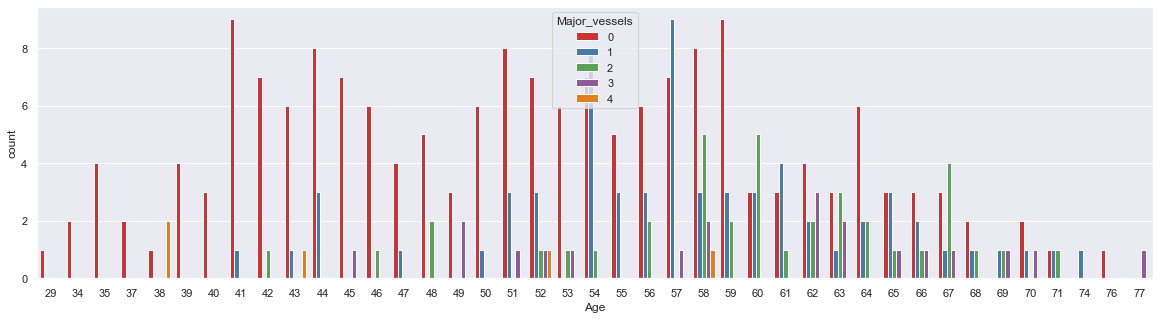

In [165]:
## Relationship between Major blood vessels and age


sns.countplot(x='Age', hue='Major_vessels', data=df, palette='Set1')
plt.show()

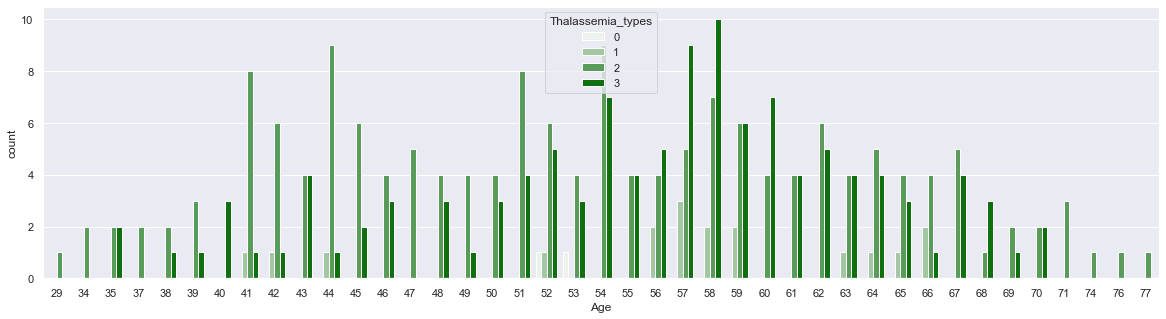

In [167]:
## Relationship between Thalassemia and age


sns.countplot(x='Age', hue='Thalassemia_types', data=df, color='green')
plt.show()

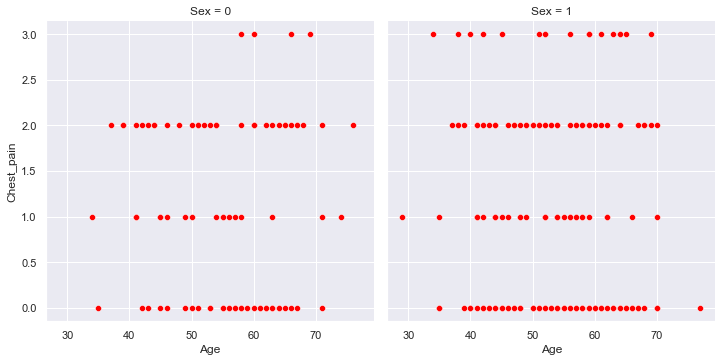

In [170]:
## relationship between chestpain, sex and age

sns.relplot(x='Age', y='Chest_pain', col='Sex', data=df, color='red', height=5)
plt.show()

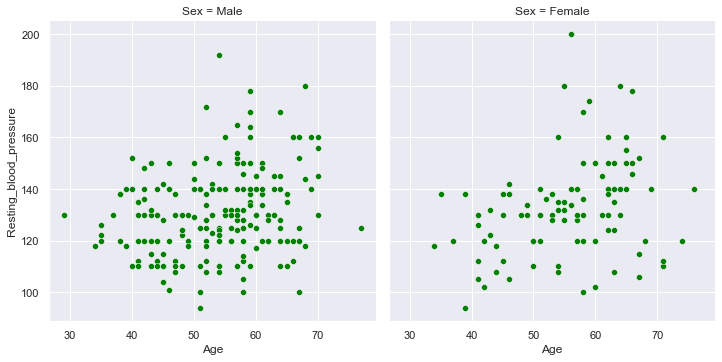

In [178]:
# relationship between age, resting blood pressure and sex

sns.relplot(x='Age', y='Resting_blood_pressure', col='Sex', data=df1, color='green')
plt.show()

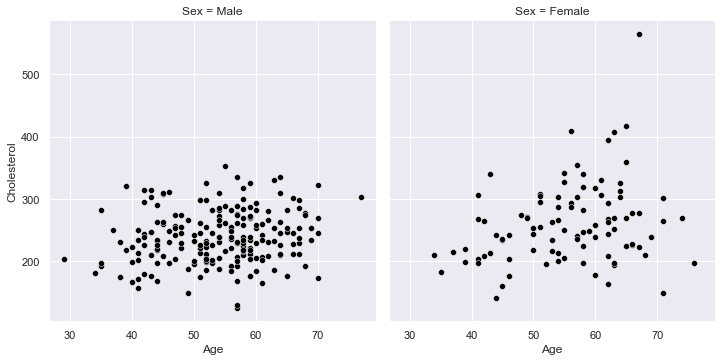

In [180]:
# relationship between sex cholesterol and age

sns.relplot(x='Age', y='Cholesterol', col='Sex', data=df1, color='black')
plt.show()

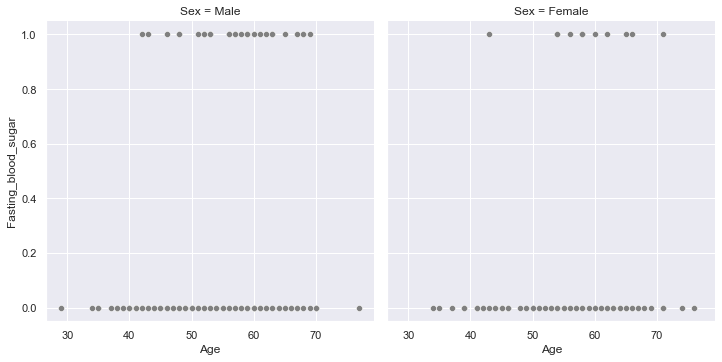

In [183]:
## Relationship between fasting blood sugar, age and sex
# blood sugar >120 is 1, 0 otherwise

sns.relplot(x='Age', y='Fasting_blood_sugar', col='Sex', data=df1, color='gray')
plt.show()

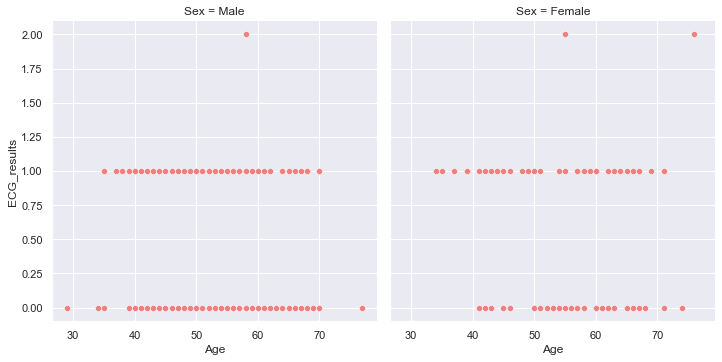

In [184]:
# relationship between age, ECG results and age

sns.relplot(x='Age', y='ECG_results', col='Sex', data=df1, color='lightcoral')
plt.show()

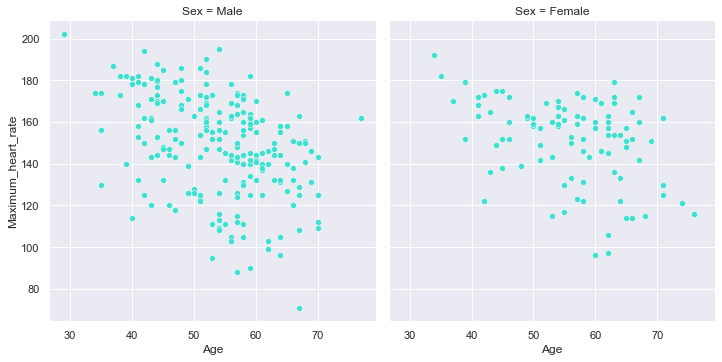

In [185]:
# relationship between age, maximum_heartrate and sex

sns.relplot(x='Age', y='Maximum_heart_rate', col='Sex', data=df1, color='turquoise')
plt.show()

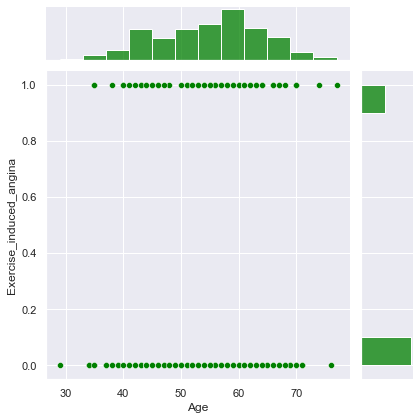

In [199]:
# relationship between exercise induced angina and age 

sns.jointplot(x='Age', y='Exercise_induced_angina', data=df1, color='green')
plt.show()

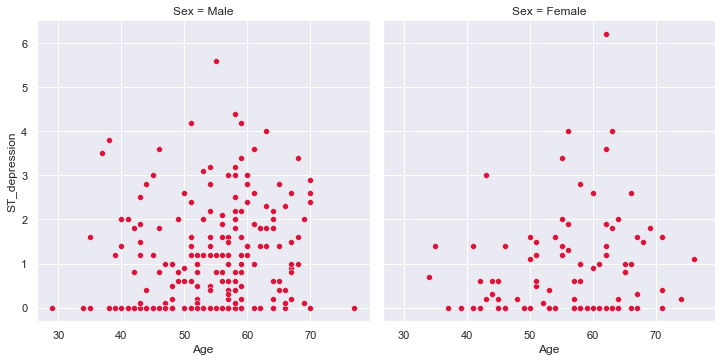

In [196]:
# relationship between age, st_depression and sex

sns.relplot(x='Age', y='ST_depression', col='Sex', data=df1, color='crimson')
plt.show()

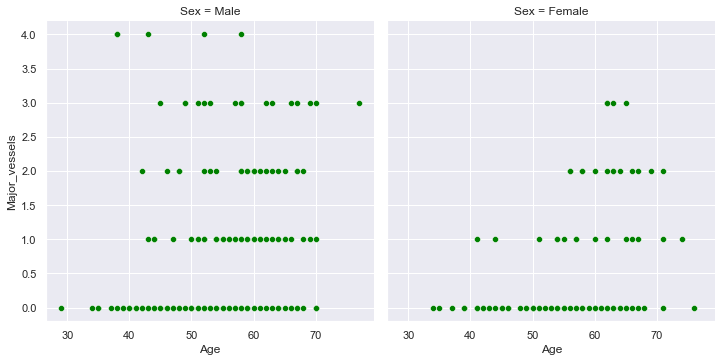

In [197]:
# relationship between age, sex and major bloodvessel (blocked) - 0 is no blocked

sns.relplot(x='Age', y='Major_vessels', col='Sex', data=df1, color='green')
plt.show()

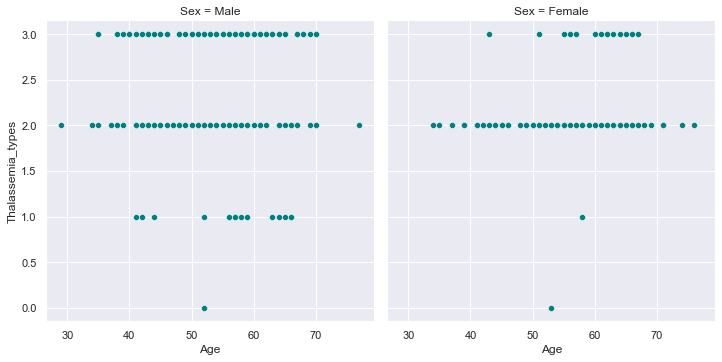

In [201]:
## relationship between thalassemia, sex and age

sns.relplot(x='Age', y='Thalassemia_types', col='Sex', data=df1, color='teal')
plt.show()

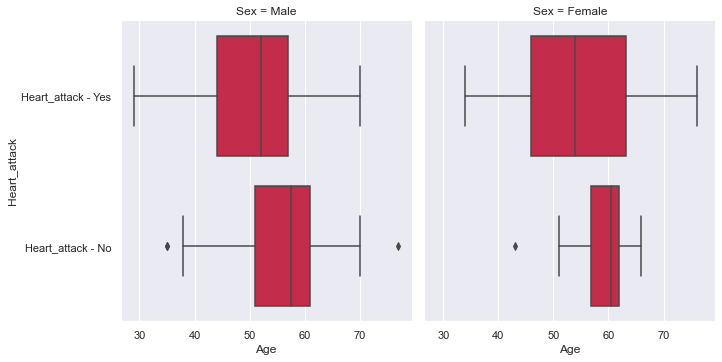

In [203]:
## relationship between heart attack, age and sex

sns.catplot(x='Age', y='Heart_attack', col='Sex', data=df1, color='crimson', kind='box')
plt.show()

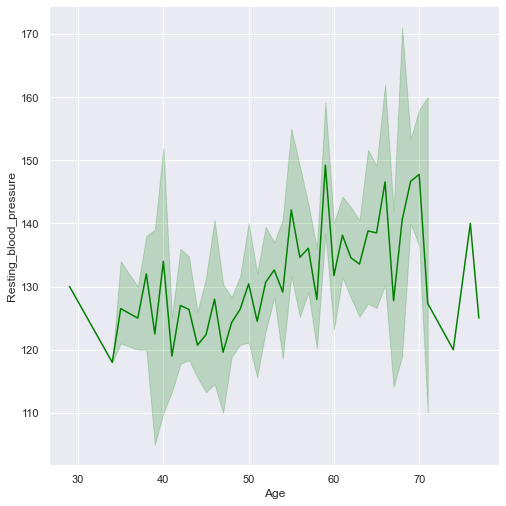

In [211]:
# relationship between heart attack, age and sex
# shaded region indicates that there are multiple values at that point

sns.relplot(x='Age', y='Resting_blood_pressure', data=df1, color='green', kind='line',
            aspect=1, height=7)
plt.show()

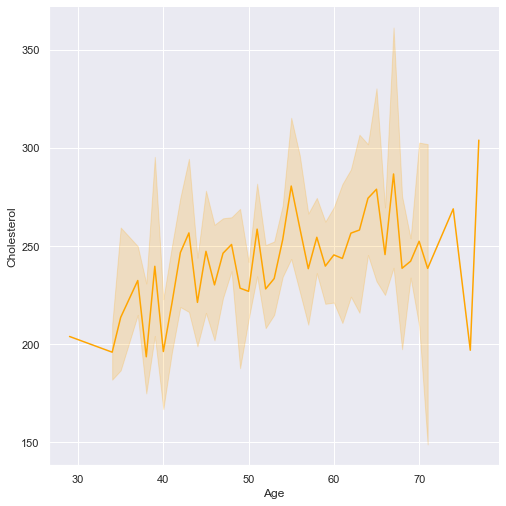

In [212]:
# relationship between age and cholesterol

sns.relplot(x='Age', y='Cholesterol', data=df1, color='orange', kind='line',
            aspect=1, height=7)
plt.show()

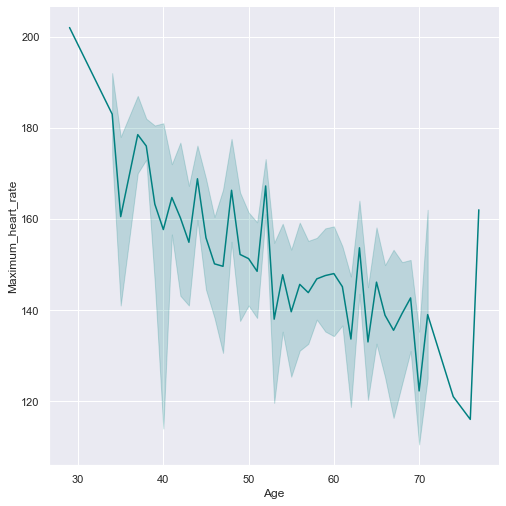

In [213]:
## relationship between maximum heartrate and age

sns.relplot(x='Age', y='Maximum_heart_rate', data=df1, color='teal', kind='line',
            aspect=1, height=7)
plt.show()

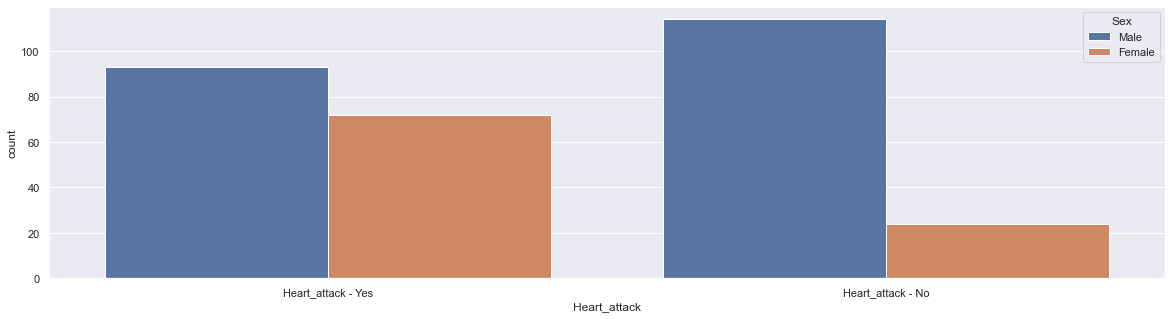

In [218]:
## plotting number of heart attacks by sex

sns.countplot(x='Heart_attack', hue='Sex', data=df1,)
plt.show()


The overall graphical analysis shows that females tend to suffer less from heart attack and that men have a higher chances of getting struck by a heart attack.
Men don't have a defined age span that they are safe from heart attack. Men below 30 also suffered from heart attack which wasn't the case with women. This shows men have to be more careful with their health conditions and situations.
Age was not such a huge critera for suffering from heart attack and rest of the parameters had very little relation amongst themselves. The tests taken showed various results where the patterns showed that the heart attack conditions could have been diagonsed a bit earlier.
If you go for some tests and the results are not good, then better proceedings need to be taken to avoid heart attack. Otherwise, there is no avoiding a heart attack.
